In [ ]:
 # https://han-py.tistory.com/272
# https://ebbnflow.tistory.com/154

import tensorflow as tf
from tensorflow.keras import preprocessing
import tensorflow.keras.layers as layers
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences


samples = ['날이 좋아, 기분이 너무 좋다',
          '오늘 기분이 별로야',
          '프로젝트 너무 힘들어',
          '문장 분류를 배워서 행복해',
          '공부는 너무 즐거워']

labels = [1, 0, 0, 1, 1]

tokenizer = preprocessing.text.Tokenizer(oov_token='temp')
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)

word_indexs = tokenizer.word_index

max_len=max(len(l) for l in sequences)

data = pad_sequences(sequences, maxlen=max_len, padding='post')

data = np.array(data)
labels = np.array(labels)

In [ ]:
tokenizer

In [ ]:
samples

['날이 좋아, 기분이 너무 좋다',
 '오늘 기분이 별로야',
 '프로젝트 너무 힘들어',
 '문장 분류를 배워서 행복해',
 '공부는 너무 즐거워']

In [ ]:
sequences

[[4, 5, 3, 2, 6], [7, 3, 8], [9, 2, 10], [11, 12, 13, 14], [15, 2, 16]]

In [ ]:
word_indexs

{'temp': 1,
 '공부는': 15,
 '기분이': 3,
 '날이': 4,
 '너무': 2,
 '문장': 11,
 '배워서': 13,
 '별로야': 8,
 '분류를': 12,
 '오늘': 7,
 '좋다': 6,
 '좋아': 5,
 '즐거워': 16,
 '프로젝트': 9,
 '행복해': 14,
 '힘들어': 10}

In [ ]:
len(word_indexs)

16

In [ ]:
print(max_len)

5


In [ ]:
print(data) # data[i]의 크기 : 1x5가 5개 => 5x5크기 (5, 5) ----> (1,5)

[[ 4  5  3  2  6]
 [ 7  3  8  0  0]
 [ 9  2 10  0  0]
 [11 12 13 14  0]
 [15  2 16  0  0]]


In [ ]:
np.shape(labels)

(5,)

In [ ]:
labels

array([1, 0, 0, 1, 1])

In [ ]:
num_epochs = 100
vocab_size = len(word_indexs) + 1
emb_size = 128
hidden_dimension = 256
output_dimension = 1

model = tf.keras.Sequential()
model.add(layers.Embedding(vocab_size, emb_size, input_length = max_len))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(hidden_dimension, activation='relu'))
model.add(layers.Dense(output_dimension, activation='sigmoid'))

model.summary()

# data[i] : 1x5
# parameter[1] : 5x128

# data[i] x parameter[1] :: 1x5  5x128  -> 1x128

# (None, 1, 128) -> (None, 128)
# (None, x, 128) -> (None, 128)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 128)            2176      
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 256)               33024     
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 35,457
Trainable params: 35,457
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),
             loss='binary_crossentropy', # 비용함수 1. 학습이 잘 되었는지 판단하는 기준, 2. 학습에 이용.
             metrics=['accuracy'])

In [ ]:
his = model.fit(data, labels, epochs=num_epochs) # <- verbose=1인 경우
#his = model.fit(data, labels, epochs=num_epochs, verbose=0) # verbose값을 바꿈으로 출력 방식을 변경 가능
#his = model.fit(data, labels, epochs=num_epochs, verbose=2)

Epoch 1/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 11/100
1/1 [=========

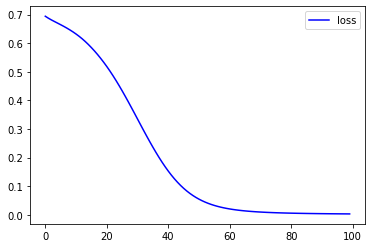

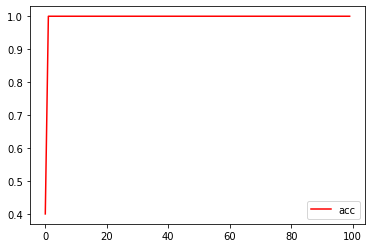

In [ ]:
import matplotlib.pyplot as plt
plt.plot(his.history['loss'], '-b', label='loss')
plt.legend()
plt.show()

plt.plot(his.history['accuracy'], '-r', label='acc')
plt.legend()
plt.show()

In [ ]:
test_text = ['수학공부는 너무 행복해']
# test_labels = [1]

test_sequences = tokenizer.texts_to_sequences(test_text)

In [ ]:
test_sequences

[[1, 2, 14]]

In [ ]:
test_data = pad_sequences(test_sequences, maxlen=max_len, padding='post')

In [ ]:
pred = model(test_data).numpy()
print(pred)

[[0.89395094]]
